# Import

In [1]:
import folium
import folium.plugins as plugins
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
# import ipywidgets as widgets
# from IPython.display import display
import seaborn as sns
from datetime import datetime, timedelta
import streamlit as st
from streamlit_folium import st_folium, folium_static

from dep.coureur import Coureur
from dep.trails import Trail
from dep.utils_trails import pred, plot_data


In [2]:
Pugin = Coureur(nom= 'PUGIN',
                   prenom= 'Jean-Francois',
                   poids=65,
                   conso_eau = 0.5, # l/h
                   conso_glucide = 60, # g/h
                   ) 
    
coureur_choisi = Pugin

PIK = f"./data/coureurs/{coureur_choisi.prenom_nom}.dat"
Trails_objects = []
with open(PIK, "rb") as f:
    while True:
            try:
                Trails_objects.append(pickle.load(f))
            except EOFError:
                break

In [3]:
for T in Trails_objects:
    print(T.nom_id)

2022TDS
2022MaXiRace
2024UTMB
2024LAVAREDO
2023WILD
ALL
PROFIL


In [15]:
i = 1
T = Trails_objects[i]

selected_trail = Trails_objects[i].nom_id

vitesse_plat = 13
vitesse_Dplus = 1713
Ralentissement = 5.1
fit_intercept = 0

In [16]:
T.df_ppassage['Point_passage'].to_list()

['Départ Annecy',
 'RAV - Semnoz',
 'Col de la Cochette',
 'Entrée RAV- Doussard',
 'Sortie RAV- Doussard',
 'Montmin',
 'Col des Nantets',
 'Roc Lancrenaz',
 'RAV - Villard Dessus',
 'Plateforme Téléphérique',
 'Mont Barron',
 'Arrivée Annecy']

In [6]:
ravito = ['Courmayeur',
#  'Checrouit - Maison Veille',
 'Arête du Mont-Favre',
#  'Lac Combal',
 'Col Chavannes',
#  'Col du petit Saint Bernard',
 'Séez',
#  'Bourg Saint-Maurice - Entrée',
 'Bourg Saint-Maurice - Sortie',
#  'Fort de la Platte',
 'Passeur de Pralognan',
#  'Cormet de Roselend',
 'La Gittaz',
#  'Entre deux Nants',
 "Pas d'Outray",
#  'Beaufort',
 'Hauteluce',
#  'Col du Joly',
 'Les Contamines Montjoie',
#  'Col de Tricot',
 'Bellevue',
#  'Les Houches',
 'Chamonix'] 

# Execution

c:\Users\nimod\.conda\envs\trail\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nimod\.conda\envs\trail\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nimod\.conda\envs\trail\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nimod\.conda\envs\trail\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

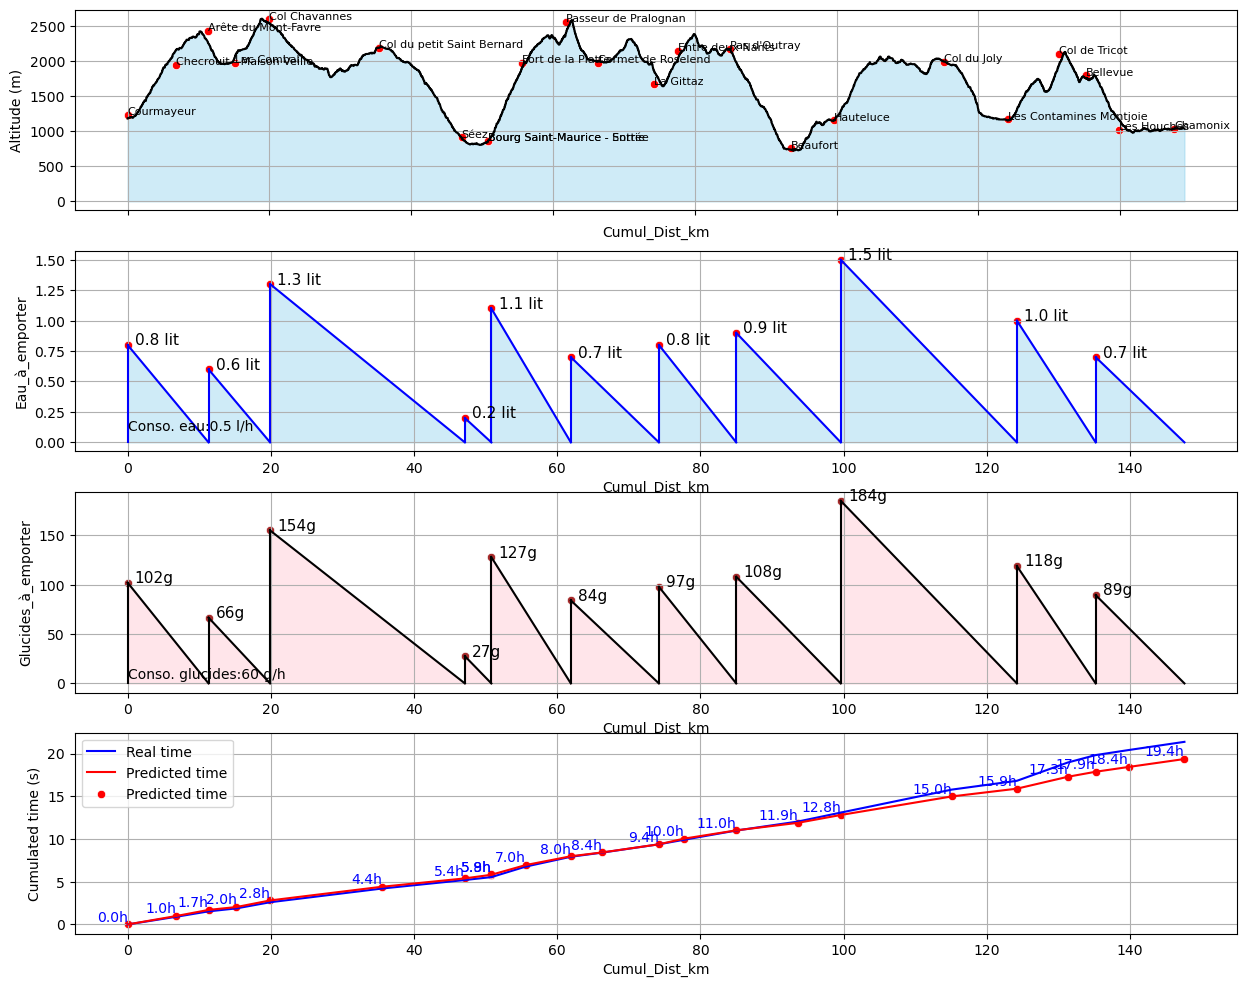

,Point_passage,Cumul_Dist_km,Cumul_D+_m,Temps_course,H_reel_h,Pred_Cum_T_Rom,Heure_Passage,Heure_predite,DELTA
0,Courmayeur,0.0,0,00:00:00,0.00,0.00,Tue. 00:00,Tue. 00:00,0.00
1,Checrouit - Maison Veille,6.8,789,00:54:14,0.90,0.99,Tue. 00:54,Tue. 00:59,0.09
2,Arête du Mont-Favre,11.3,1383,01:32:04,1.53,1.70,Tue. 01:32,Tue. 01:42,0.17
3,Lac Combal,15.2,1423,01:52:52,1.88,2.04,Tue. 01:53,Tue. 02:02,0.16
4,Col Chavannes,19.9,2067,02:35:56,2.60,2.81,Tue. 02:36,Tue. 02:48,0.21
5,Col du petit Saint Bernard,35.5,2665,04:12:14,4.20,4.41,Tue. 04:12,Tue. 04:24,0.21
6,Séez,47.1,2705,05:11:49,5.20,5.39,Tue. 05:12,Tue. 05:23,0.19
7,Bourg Saint-Maurice - Entrée,50.8,2765,05:29:01,5.48,5.78,Tue. 05:29,Tue. 05:46,0.30
8,Bourg Saint-Maurice - Sortie,50.8,2765,05:35:48,5.60,5.85,Tue. 05:36,Tue. 05:51,0.25
9,Fort de la Platte,55.6,3882,06:46:23,6.77,6.95,Tue. 06:46,Tue. 06:57,0.18


In [12]:
df_p, df_eau, df_glucide = pred(T=T, i=i, vit_plat=vitesse_plat, vit_Dplus=vitesse_Dplus, ralentissement=Ralentissement, fit_intercept=fit_intercept,
         conso_eau=coureur_choisi.conso_eau, liste_ravito_liquide=ravito, 
         conso_glucide=coureur_choisi.conso_glucide, liste_ravito_solide=ravito,
         )

In [13]:
map = T.plot_parcours(df=df_p, vit_plat=vitesse_plat, vit_Dplus=vitesse_Dplus, 
                        ralentissement=Ralentissement, fit_intercept=fit_intercept)
        
map

In [14]:
df_p = df_p.merge(df_eau[['Point_passage', 'Cumul_Dist_km', 'Eau_à_emporter']], on=['Point_passage','Cumul_Dist_km'], how='left')
df_p = df_p.merge(df_glucide[['Point_passage', 'Cumul_Dist_km', 'Glucides_à_emporter']], on=['Point_passage', 'Cumul_Dist_km'], how='left')
df_p[['Point_passage', 'Cumul_Dist_km','Cumul_D+_m','Pred_Cum_T_Rom',
                    'Heure_predite', 'Eau_à_emporter', 'Glucides_à_emporter']]

,Point_passage,Cumul_Dist_km,Cumul_D+_m,Pred_Cum_T_Rom,Heure_predite,Eau_à_emporter,Glucides_à_emporter
0,Courmayeur,0.0,0,0.00,Tue. 00:00,0.8,102.0
1,Checrouit - Maison Veille,6.8,789,0.99,Tue. 00:59,NaN,NaN
2,Arête du Mont-Favre,11.3,1383,1.70,Tue. 01:42,0.6,66.6
3,Lac Combal,15.2,1423,2.04,Tue. 02:02,NaN,NaN
4,Col Chavannes,19.9,2067,2.81,Tue. 02:48,1.3,154.8
5,Col du petit Saint Bernard,35.5,2665,4.41,Tue. 04:24,NaN,NaN
6,Séez,47.1,2705,5.39,Tue. 05:23,0.2,27.6
7,Bourg Saint-Maurice - Entrée,50.8,2765,5.78,Tue. 05:46,NaN,NaN
8,Bourg Saint-Maurice - Sortie,50.8,2765,5.85,Tue. 05:51,1.1,127.8
9,Fort de la Platte,55.6,3882,6.95,Tue. 06:57,NaN,NaN
